In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from io import BytesIO
from IPython.display import display, Image
import statsmodels.api as sm

In [160]:
def algorithm_analyze(code_str, input_type):

    coeficient_number = 5
    n_range = 500

    def get_function_object(code_str):
        local_scope = {}
        
        # Execute the function definon in a scope where it can recursively reference itself
        exec(code_str, local_scope, local_scope)  # Using local_scope as both global and local scope
        
        func_name = next(key for key, value in local_scope.items() if callable(value))
        algorithm = local_scope[func_name]
        
        return algorithm



    def get_graph(function, input_type):
        if input_type == 'list':
            sizes, times = list_input(function)  # This function should be defined elsewhere

            # Fit a polynomial curve to the data
            coefficients = np.polyfit(sizes, times, deg=4)  # Degree 4 polynomial
            poly = np.poly1d(coefficients)

            # Generate smooth data for the fitted curve
            smooth_sizes = np.linspace(min(sizes), max(sizes), 500)  # Smooth sizes from min to max size
            smooth_times = poly(smooth_sizes)  # Evaluate polynomial

            plt.figure()
            plt.plot(sizes, times, 'o', markersize=3, label='Original Data', color='white')  # Original data points
            plt.plot(smooth_sizes, smooth_times, 'r-', label='Fitted Curve')  # Fitted curve
            plt.axis('off')  # Hide the axes

            # Save the plot to a BytesIO stream
            buf = BytesIO()
            plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
            plt.close()  # Close the figure to free memory
            buf.seek(0)  # Rewind your buffer
            return buf, coefficients.tolist()

    def list_input(function):
        
        n_size = n_range
        a_size = 100
        sizes = list(range(1, n_size)) 
        times = []

    
        for size in sizes:
        
            test_list = [random.randint(1, a_size) for _ in range(size)]

        
            start_time = time.perf_counter()  # Start timing
            function(test_list)  # Execute the function
            end_time = time.perf_counter()  # End timing

            # Calculate the elapsed time and append to times list
            elapsed_time = end_time - start_time
            times.append(elapsed_time)

        # Return the sizes and times
        return sizes, times
    
    algorithm = get_function_object(code_str)
    buf, coefficients = get_graph(algorithm, input_type)
    return buf, coefficients



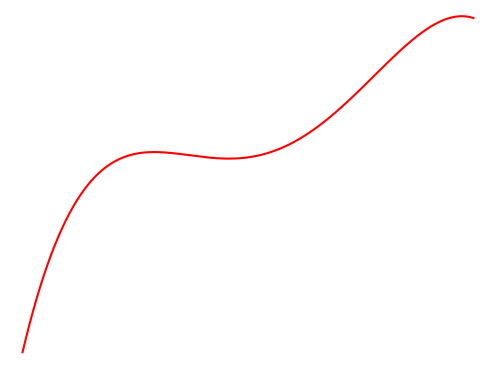

Coefficients: [-2.6521972877782483e-15, 3.0463314293607286e-12, -1.1457095658739157e-09, 1.729317046220365e-07, -7.388947064359785e-07]


In [164]:
function = """
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        less = [x for x in arr[1:] if x <= pivot]
        greater = [x for x in arr[1:] if x > pivot]
        return quick_sort(less) + [pivot] + quick_sort(greater)
"""

function = """
def function_name(arr):
    n = 1
    
"""

function = """
def function_name(arr):
    for i in range(len(arr)):
        n = 1
        n = n + 1
"""

buf, coefficients = algorithm_analyze(function, 'list')

display(Image(data=buf.getvalue()))  # Display the image
print("Coefficients:", coefficients)

In [27]:
def save_algoritm_output(code_str, input_type, complexity_type, repeat):
    image, coefficients = algorithm_analyze(code_str, input_type)
    
    

    